<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
FLIGHT DELAY PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Predicting flight delays accurately can help airlines and passengers make informed decisions

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT LIBRARIES</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore')

In [2]:
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.impute import SimpleImputer

## import data

In [3]:
df_2019 = pd.read_csv('jan_2019_ontime.csv')
df_2020 = pd.read_csv('jan_2020_ontime.csv')

## data cleaning

In [4]:
df_2019

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [5]:
df_2020

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [7]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [8]:
df_2019.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [9]:
df_2020.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [10]:
columns_names =df_2020.columns
j=0
for i in df_2020.columns:
    print("{} has got {} null samples".format(df_2020.columns[j],df_2020[i].isnull().sum()))
    j = j+1


DAY_OF_MONTH has got 0 null samples
DAY_OF_WEEK has got 0 null samples
OP_UNIQUE_CARRIER has got 0 null samples
OP_CARRIER_AIRLINE_ID has got 0 null samples
OP_CARRIER has got 0 null samples
TAIL_NUM has got 698 null samples
OP_CARRIER_FL_NUM has got 0 null samples
ORIGIN_AIRPORT_ID has got 0 null samples
ORIGIN_AIRPORT_SEQ_ID has got 0 null samples
ORIGIN has got 0 null samples
DEST_AIRPORT_ID has got 0 null samples
DEST_AIRPORT_SEQ_ID has got 0 null samples
DEST has got 0 null samples
DEP_TIME has got 6664 null samples
DEP_DEL15 has got 6699 null samples
DEP_TIME_BLK has got 0 null samples
ARR_TIME has got 7075 null samples
ARR_DEL15 has got 8078 null samples
CANCELLED has got 0 null samples
DIVERTED has got 0 null samples
DISTANCE has got 0 null samples
Unnamed: 21 has got 607346 null samples


In [11]:
df_2020.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [12]:
df = pd.concat([df_2019,df_2020], ignore_index=0 )

In [13]:
df.shape

(1191331, 22)

In [14]:
sd = df.to_csv("df.csv")

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
EXPLORATORY DATA ANALYSIS</h1>

<Axes: >

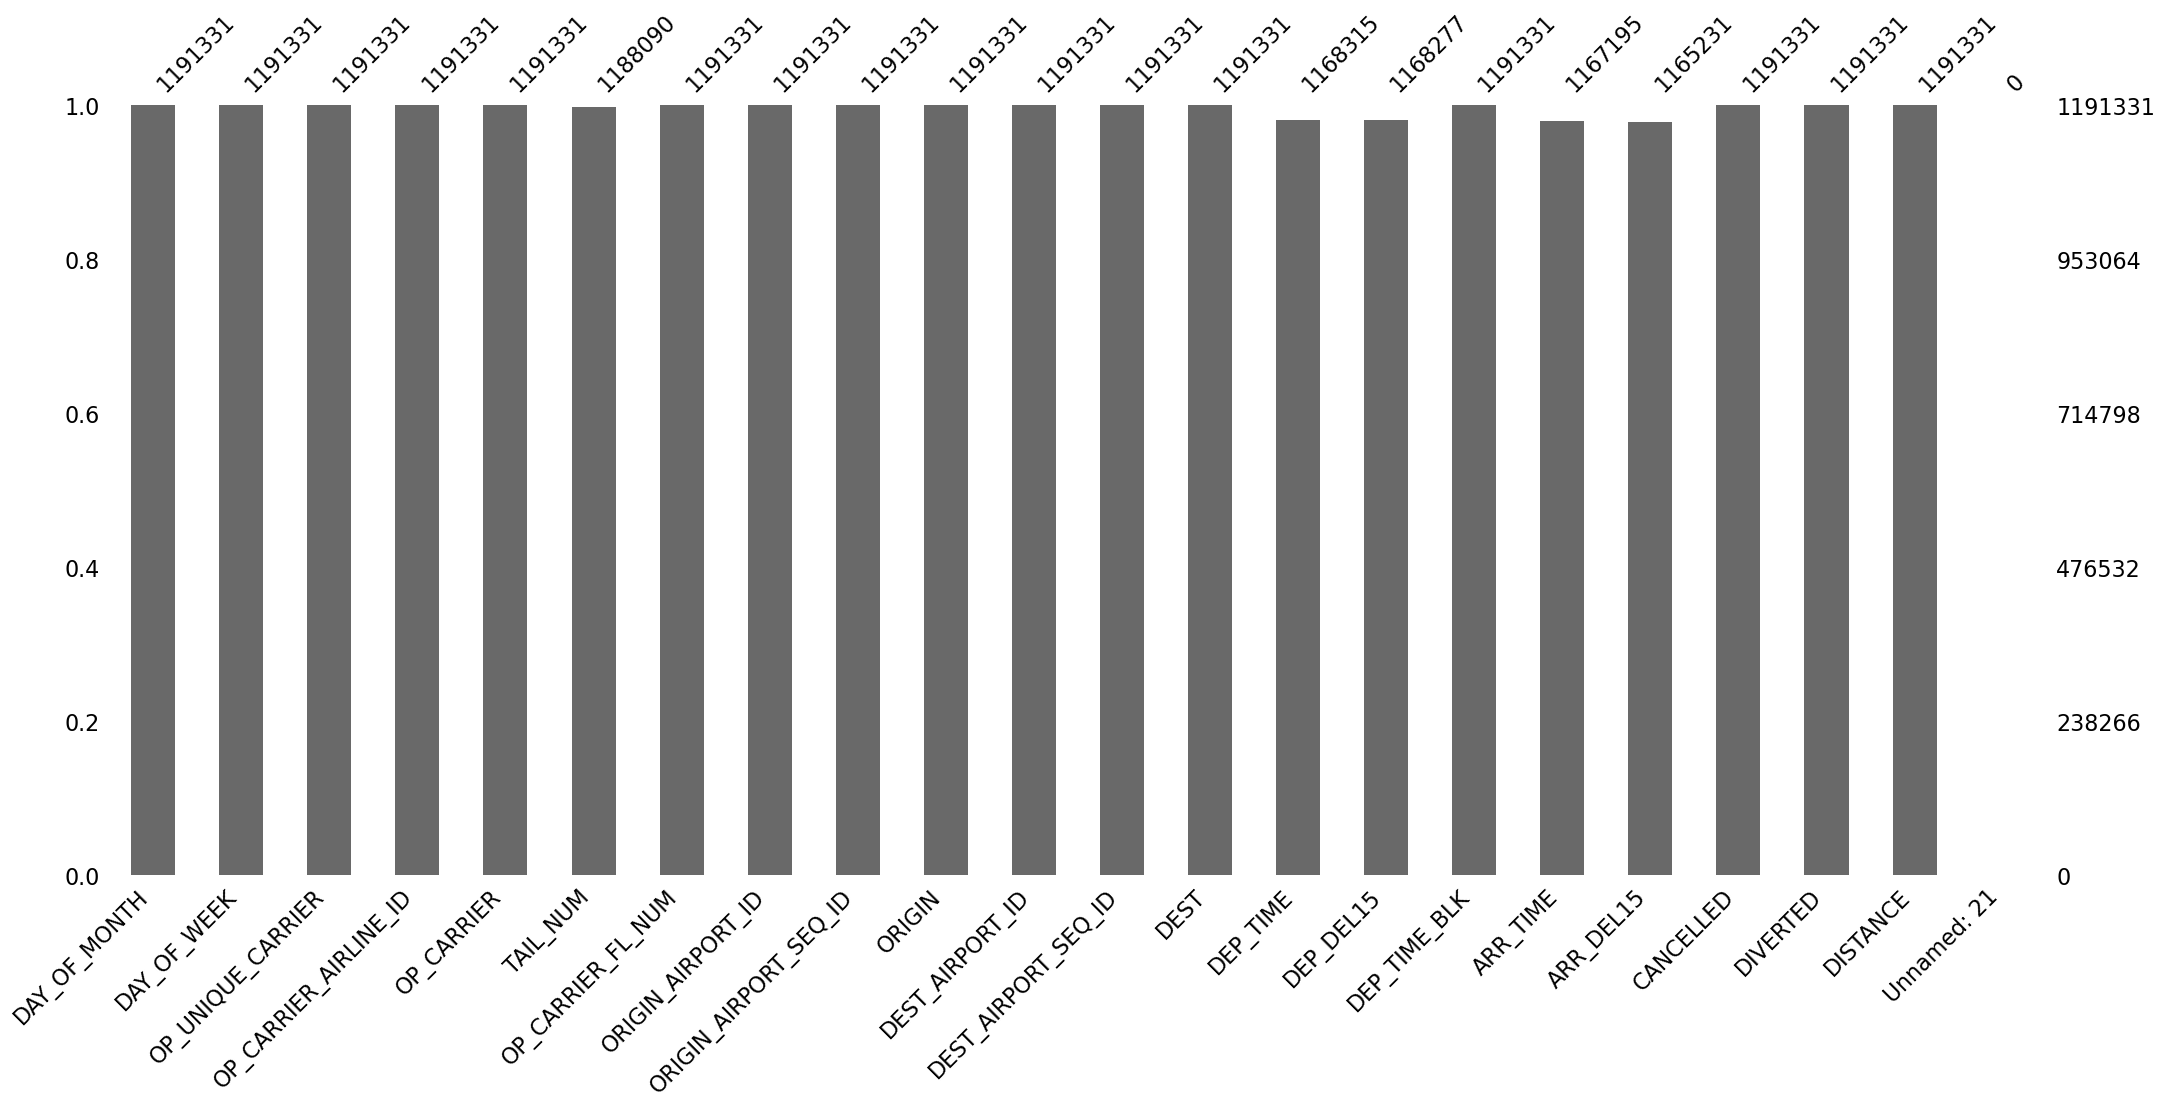

In [15]:
plt.figure(figsize=(4,4))
msno.bar(df)

<Axes: >

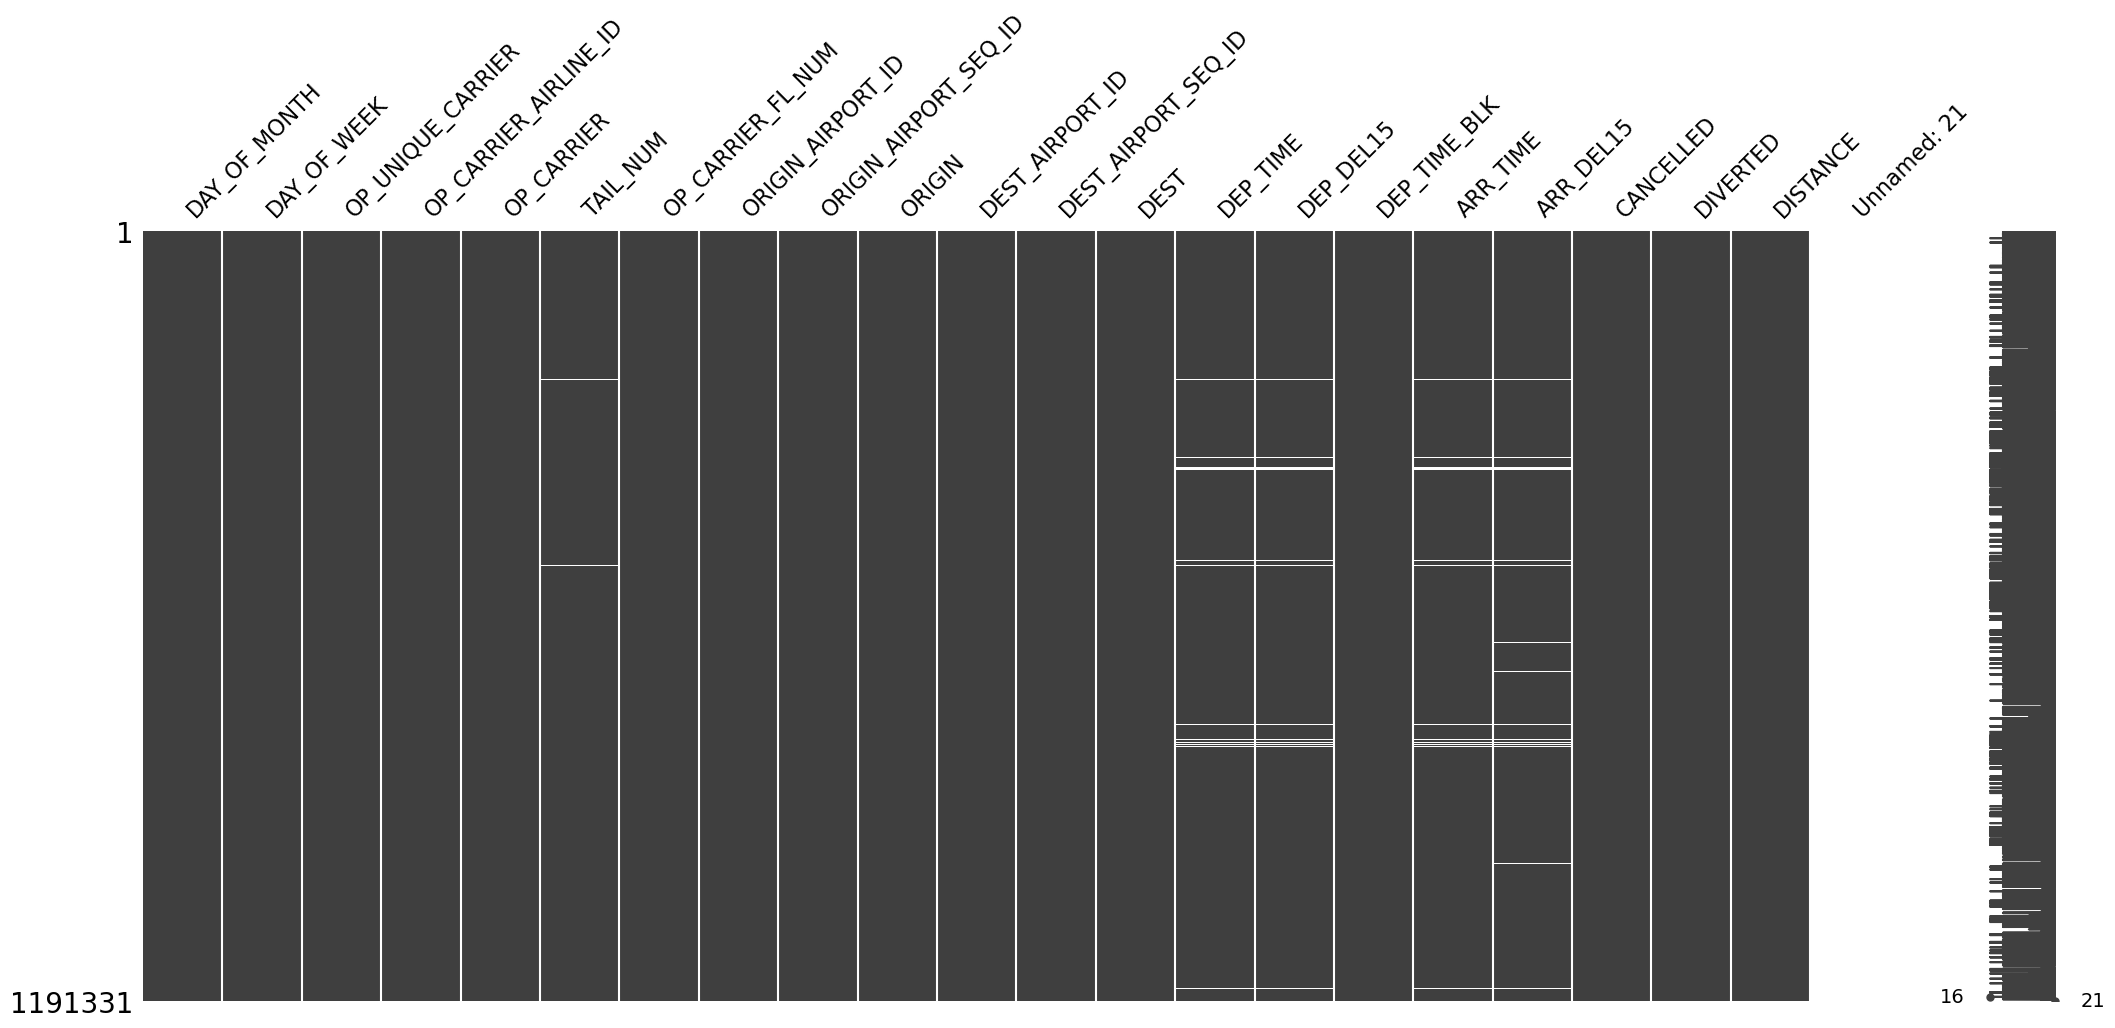

In [16]:
msno.matrix(df)

<Axes: >

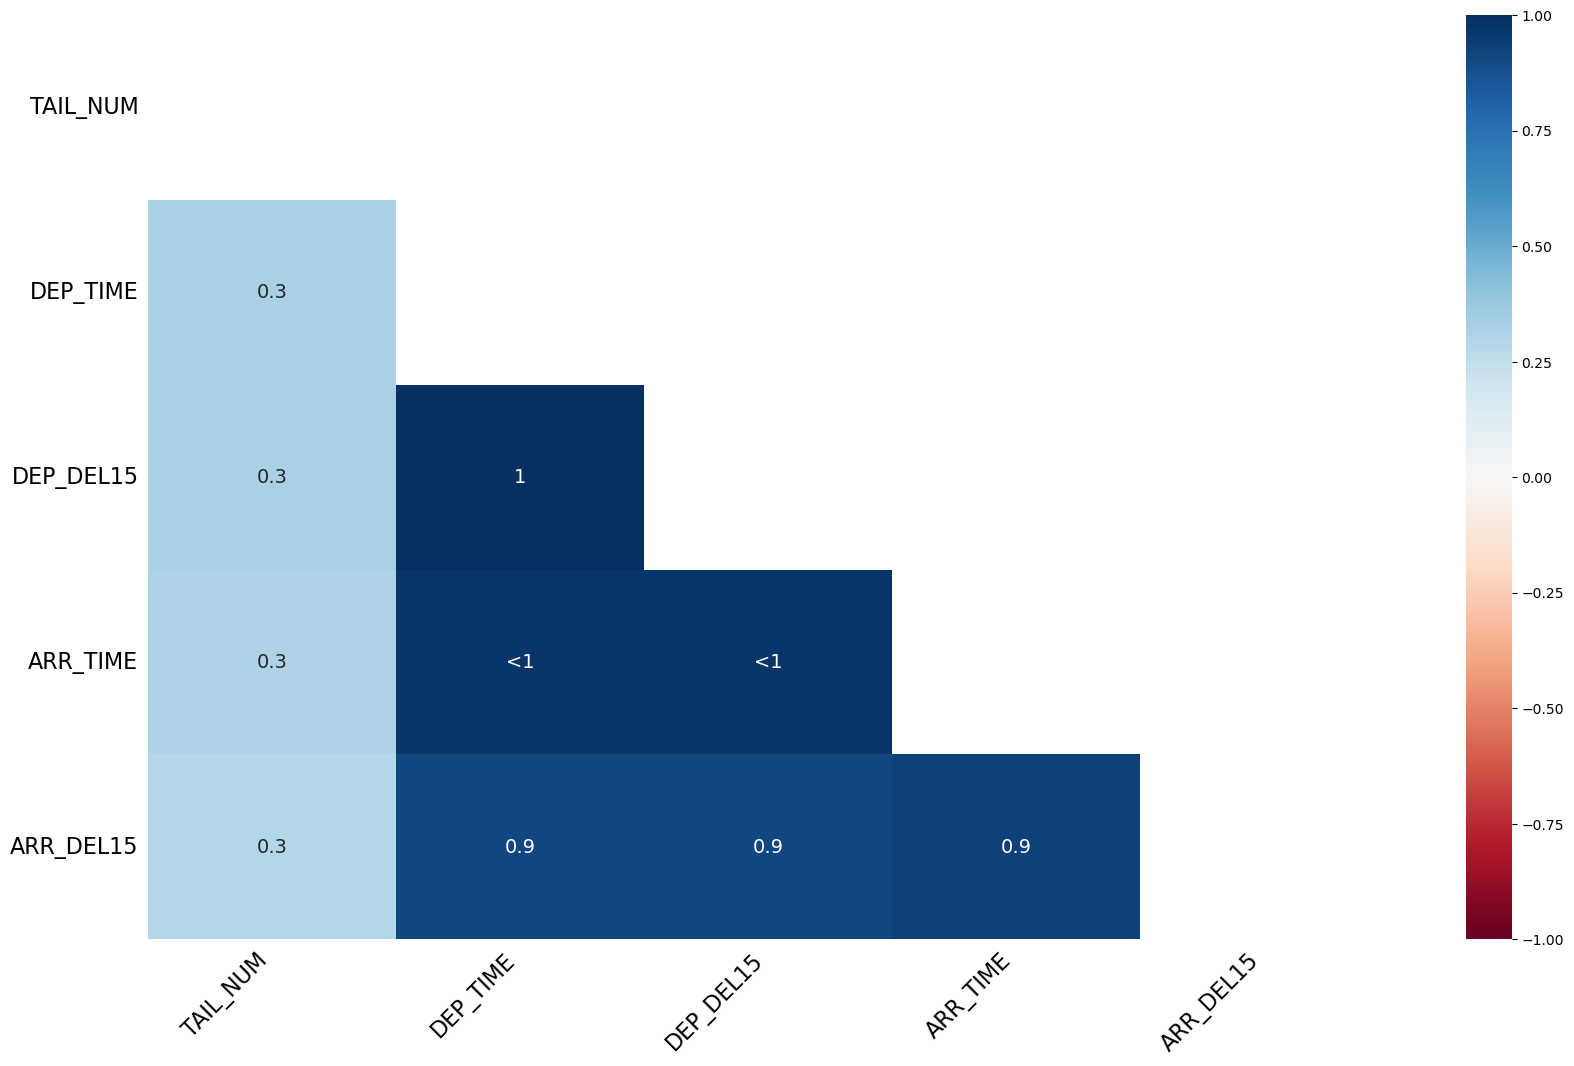

In [17]:
msno.heatmap(df_2020)

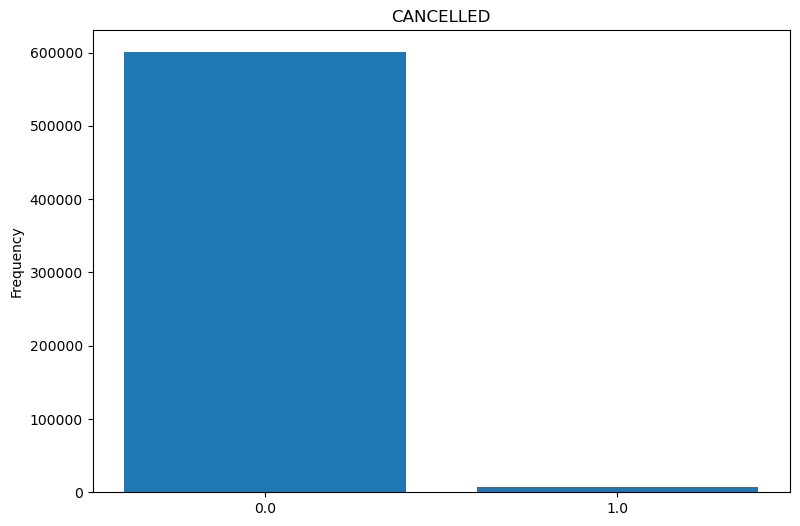

CANCELLED 
 CANCELLED
0.0    600418
1.0      6928
Name: count, dtype: int64


In [18]:
def bar_plot(variable):
    var = df_2020[variable] # get feature
    varValue = var.value_counts() # count number of categorical variable(value/sample)
    
    plt.figure(figsize = (9,6))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable,varValue))
    
bar_plot('CANCELLED')

## PREPROCESSING

In [19]:
df = df.dropna(subset=['TAIL_NUM'])
print(df['TAIL_NUM'].isna().sum())
print(df.shape)

0
(1188090, 22)


In [20]:
## if delay is less than 15 min , we denote as not delay 0, apply for all NAN
df['DEP_DEL15'] = df['DEP_DEL15'].replace(np.NaN,0)
df['DEP_DEL15'].isnull().sum()

0

In [21]:
df['ARR_DEL15'] = df['ARR_DEL15'].replace(np.NaN,0)
df['ARR_DEL15'].isnull().sum()

0

In [22]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Here we fiiling missing values with "mean value of that columns"</h1>

In [23]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
df['DEP_TIME'] = imp_mean.fit_transform(df[['DEP_TIME']])
df['ARR_TIME'] = imp_mean.fit_transform(df[['ARR_TIME']])

In [24]:
column_names = df.columns
j=0
for i in df.columns:
    print("  {} has got {} NaN Sample " .format(df.columns[j],df[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH has got 0 NaN Sample 
  DAY_OF_WEEK has got 0 NaN Sample 
  OP_UNIQUE_CARRIER has got 0 NaN Sample 
  OP_CARRIER_AIRLINE_ID has got 0 NaN Sample 
  OP_CARRIER has got 0 NaN Sample 
  TAIL_NUM has got 0 NaN Sample 
  OP_CARRIER_FL_NUM has got 0 NaN Sample 
  ORIGIN_AIRPORT_ID has got 0 NaN Sample 
  ORIGIN_AIRPORT_SEQ_ID has got 0 NaN Sample 
  ORIGIN has got 0 NaN Sample 
  DEST_AIRPORT_ID has got 0 NaN Sample 
  DEST_AIRPORT_SEQ_ID has got 0 NaN Sample 
  DEST has got 0 NaN Sample 
  DEP_TIME has got 0 NaN Sample 
  DEP_DEL15 has got 0 NaN Sample 
  DEP_TIME_BLK has got 0 NaN Sample 
  ARR_TIME has got 0 NaN Sample 
  ARR_DEL15 has got 0 NaN Sample 
  CANCELLED has got 0 NaN Sample 
  DIVERTED has got 0 NaN Sample 
  DISTANCE has got 0 NaN Sample 
  Unnamed: 21 has got 1188090 NaN Sample 


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
As per importance of the labels we fill the NaN values some are with mean, and some are with zero

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
correclation Matric

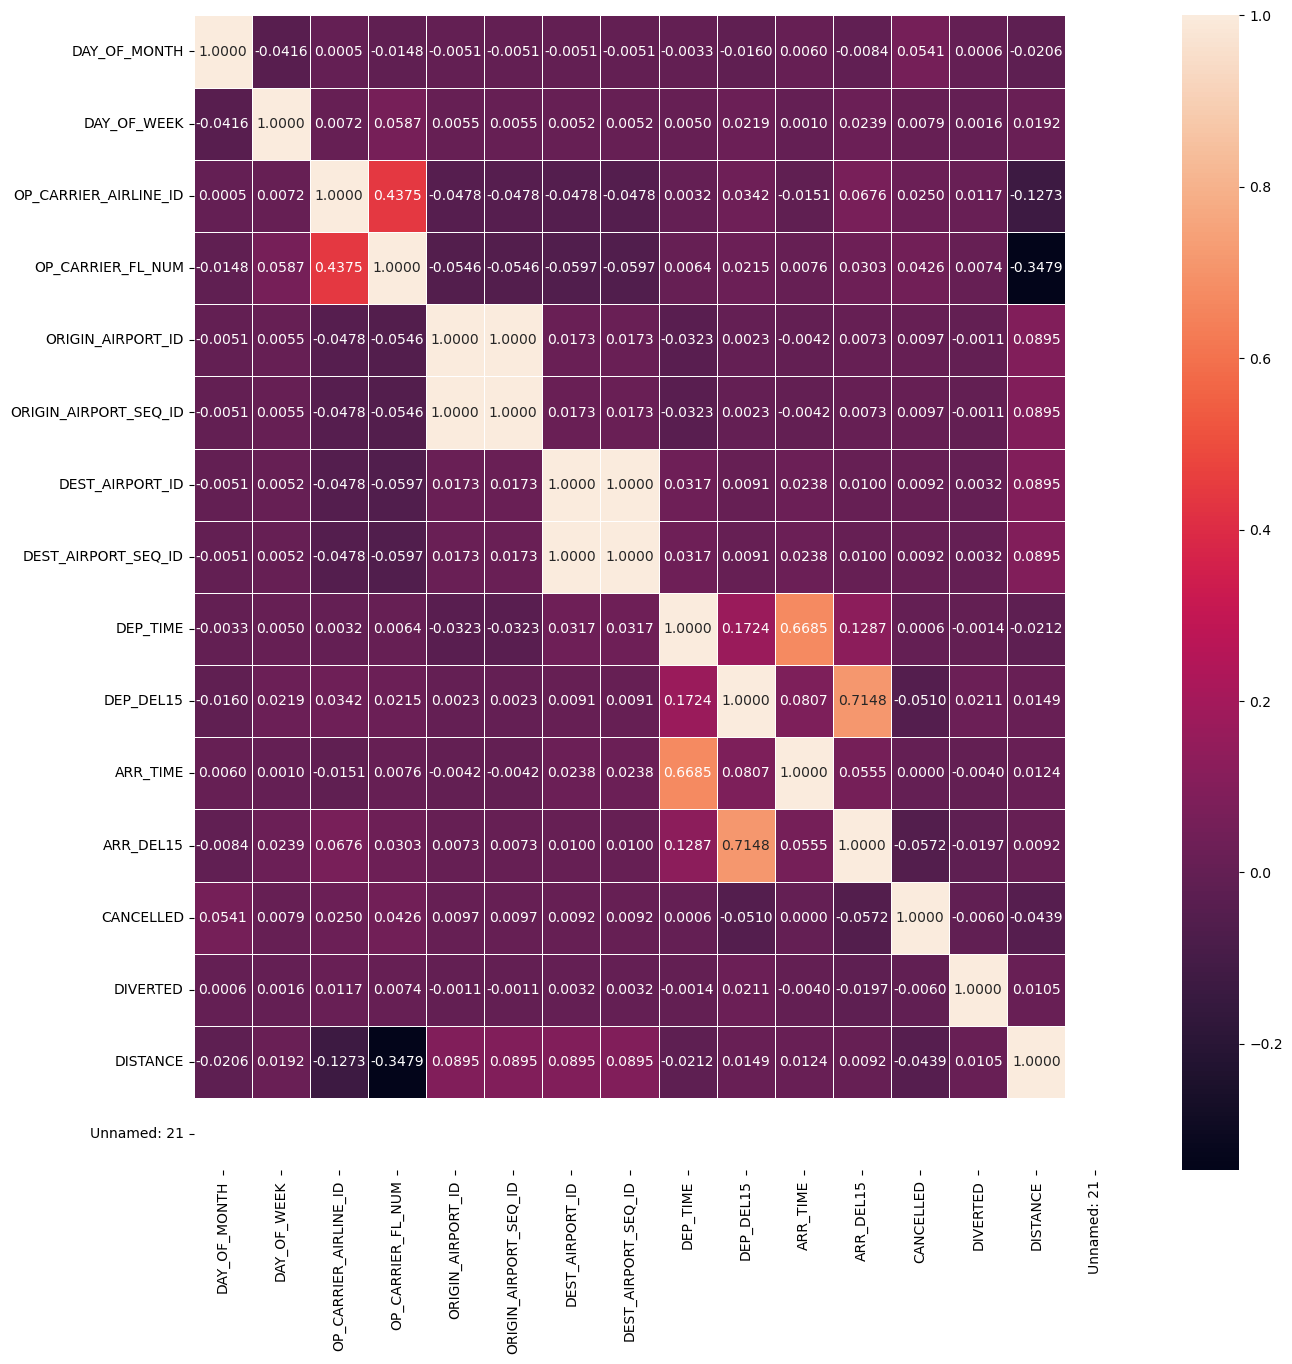

In [25]:

correlation_data = df.select_dtypes(include=[np.number]).corr()

f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(correlation_data,linewidths=.5,annot=True,fmt='.4f',ax=ax)
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">Above relation says that relation between DEST_AIRPORT_ID - DEST_AIRPORT_SEQ_ID  and  ORIGIN_AIRPORT_ID - ORIGIN_AIRPORT_SEQ_ID so we drop each one of them

In [26]:
df = df.drop(['DEST_AIRPORT_SEQ_ID'],axis=1)
df = df.drop(['ORIGIN_AIRPORT_SEQ_ID'],axis=1)
print(df.shape)

(1188090, 20)


In [27]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,TYS,11433,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,DTW,12478,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,GSP,12953,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,ATL,15919,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [28]:
df = df.drop(['Unnamed: 21'], axis = 1)

In [40]:
df = df.drop(columns=['OP_CARRIER','TAIL_NUM'], axis =1)

In [37]:
df = df.drop(columns=['OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_TIME_BLK'], axis =1)

In [48]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,3280,11953,10397,601.0,0.0,722.0,0.0,0.0,0.0,300.0
1,1,2,20363,3281,13487,11193,1359.0,0.0,1633.0,0.0,0.0,0.0,596.0
2,1,2,20363,3282,11433,11193,1215.0,0.0,1329.0,0.0,0.0,0.0,229.0
3,1,2,20363,3283,15249,10397,1521.0,0.0,1625.0,0.0,0.0,0.0,223.0
4,1,2,20363,3284,10397,11778,1847.0,0.0,1940.0,0.0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,20363,4812,15412,11433,1002.0,1.0,1128.0,1.0,0.0,0.0,443.0
607342,31,5,20363,4813,11433,12478,1747.0,0.0,1933.0,0.0,0.0,0.0,509.0
607343,31,5,20363,4814,11996,12953,554.0,0.0,752.0,0.0,0.0,0.0,610.0
607344,31,5,20363,4815,10397,15919,1714.0,0.0,1811.0,0.0,0.0,0.0,589.0


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
preparation for model

In [41]:
y = df.CANCELLED
X = df

In [42]:
 X.info() #OP_UNIQUE_CARRIER OP_CARRIER TAIL_NUM    ORIGIN     DEST    DEP_TIME_BLK 

<class 'pandas.core.frame.DataFrame'>
Index: 1188090 entries, 0 to 607345
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1188090 non-null  int64  
 1   DAY_OF_WEEK            1188090 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  1188090 non-null  int64  
 3   OP_CARRIER_FL_NUM      1188090 non-null  int64  
 4   ORIGIN_AIRPORT_ID      1188090 non-null  int64  
 5   DEST_AIRPORT_ID        1188090 non-null  int64  
 6   DEP_TIME               1188090 non-null  float64
 7   DEP_DEL15              1188090 non-null  float64
 8   ARR_TIME               1188090 non-null  float64
 9   ARR_DEL15              1188090 non-null  float64
 10  CANCELLED              1188090 non-null  float64
 11  DIVERTED               1188090 non-null  float64
 12  DISTANCE               1188090 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 126.9 MB


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

In [44]:
clf_dt = DecisionTreeClassifier(random_state = 0)
model_dt = clf_dt.fit(X_train, y_train) 

[Text(0.5, 0.75, 'x[10] <= 0.5\ngini = 0.034\nsamples = 831663\nvalue = [817269.0, 14394.0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 817269\nvalue = [817269, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 14394\nvalue = [0, 14394]'),
 Text(0.625, 0.5, '  False')]

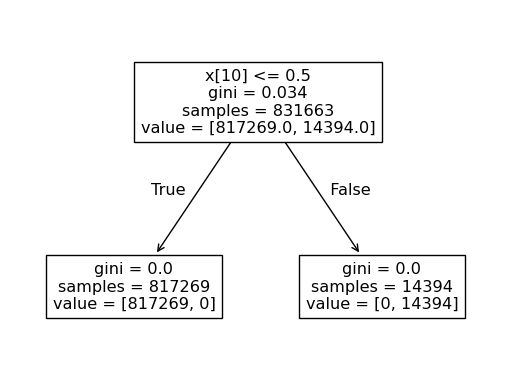

In [45]:
tree.plot_tree(model_dt) 

In [46]:
y_pred = model_dt.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    350408
         1.0       1.00      1.00      1.00      6019

    accuracy                           1.00    356427
   macro avg       1.00      1.00      1.00    356427
weighted avg       1.00      1.00      1.00    356427



In [47]:
y_test.value_counts()

CANCELLED
0.0    350408
1.0      6019
Name: count, dtype: int64

# Use the selected model to predict flight cancellations for new or upcoming flights, providing valuable insights for airlines, passengers, and airports.

## HERE IT SHOWS ALL MODELS ARE GIVING THE SAME PREDICTION

In [49]:
df = pd.DataFrame({
    'Year': [2023, 2023],
    'Week': [32, 33],
    'Day': [3, 5]  # 1=Monday, 7=Sunday
})

# Convert to date
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-W' + df['Week'].astype(str) + '-' + df['Day'].astype(str),
                            format='%Y-W%U-%w')

print(df)


   Year  Week  Day       Date
0  2023    32    3 2023-08-09
1  2023    33    5 2023-08-18
